In [12]:
import os

import tensorflow as tf
import umap
import umap.plot
from tsnecuda import TSNE
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import datashader as ds
import colorcet
from nltk.corpus import stopwords

# from dask.distributed import Client

from lib.glove.glove import GloVe

In [2]:
filepath_words = "/mnt/research-data/main/twitter/new/UMAP-tweets-all-new-20220117-wordlist.txt"
# Multilingual, ref https://github.com/stopwords-iso/stopwords-iso/blob/682bcc330e7ebca13e928349263560e3bae84830/stopwords-iso.json
filepath_stopwords = "/mnt/research-data/main/stopwords.txt"


In [3]:
with open(filepath_stopwords) as handle:
	stopwords = [ word.strip() for word in handle ]

In [4]:
words = []
with open(filepath_words) as handle:
	stopwords_skipped = 0
	for line in handle:
		row = line.split("\t", maxsplit=1)
		if row == "" or len(row) < 2:
			continue
		try:
			row[0] = int(row[0])
		except:
			continue
		row[1] = row[1].rstrip("\n")
		if row[1] in stopwords:
			continue
		words.append(row)


print(f"{len(words)} read, {stopwords_skipped} stopwords skipped")
	

1499544 read, 0 stopwords skipped


In [5]:
print(len(words))
words

1499544


[[1, '\ue04b'],
 [1, '\ue057'],
 [1, '\ue331'],
 [1, '\ue058'],
 [1, '\ue04b'],
 [1, '\ue41d'],
 [1, '한'],
 [1, '\ue402'],
 [1, '\ue331'],
 [1, '\ue41d'],
 [1, '\ue331'],
 [1, '\ue01b'],
 [1, '\ue895'],
 [1, '\ue415'],
 [1, '\ue059'],
 [1, '해'],
 [1, '\ue13c'],
 [1, '\ue04b'],
 [1, '\ue107'],
 [1, '\ue00e'],
 [1, '\ue331'],
 [1, '\ue00e'],
 [1, '\ue04a'],
 [1, '\ue402'],
 [1, '\ue058'],
 [1, '\ue058'],
 [1, '\ue41d'],
 [1, '\ue135'],
 [1, '더'],
 [1, '\uf62e'],
 [1, '\ue40d'],
 [1, '중'],
 [1, '🧊'],
 [1, '🧐'],
 [1, '🤮'],
 [1, '🥺'],
 [1, '🤮'],
 [1, '🤬'],
 [1, '🧸'],
 [1, '🧐'],
 [1, '🤭'],
 [1, '🪁'],
 [1, '🤩'],
 [1, '🤬'],
 [1, '🤍'],
 [1, '🥲'],
 [1, '🤬'],
 [1, '🦫'],
 [1, '🤟'],
 [1, '🥏'],
 [1, '🥺'],
 [1, '🤫'],
 [1, '🧳'],
 [1, '🥶'],
 [1, '🧨'],
 [1, '🧡'],
 [1, '🥺'],
 [1, '🧢'],
 [1, '🥰'],
 [1, '🥺'],
 [1, '🤲'],
 [1, '🥴'],
 [1, '🤭'],
 [1, '🥶'],
 [1, '🥳'],
 [1, '🥾'],
 [1, '🤪'],
 [1, '🤬'],
 [1, '🥺'],
 [1, '🧐'],
 [1, '🤭'],
 [1, '🤨'],
 [1, '🟥'],
 [1, '🟦'],
 [1, '🤪'],
 [1, '🟠'],
 [1, '🤨'],
 [1, '🤬'],
 [

In [6]:
glove = GloVe("/mnt/research-data/main/glove/glove.twitter.27B.25d.txt")


words_glove = [ glove.lookup(row[1]) for row in words ]
words_glove = list(filter(lambda vector: vector is not None, words_glove))

len(words_glove)

words_glove = np.array(words_glove)


Loading GloVe from '/mnt/research-data/main/glove/glove.twitter.27B.25d.txt': 1190000... done in 9.436s.


In [7]:
dimreducer = umap.UMAP(
	min_dist=0.05 # default: 0.1
).fit(words_glove)

/home/bryan-smithl/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


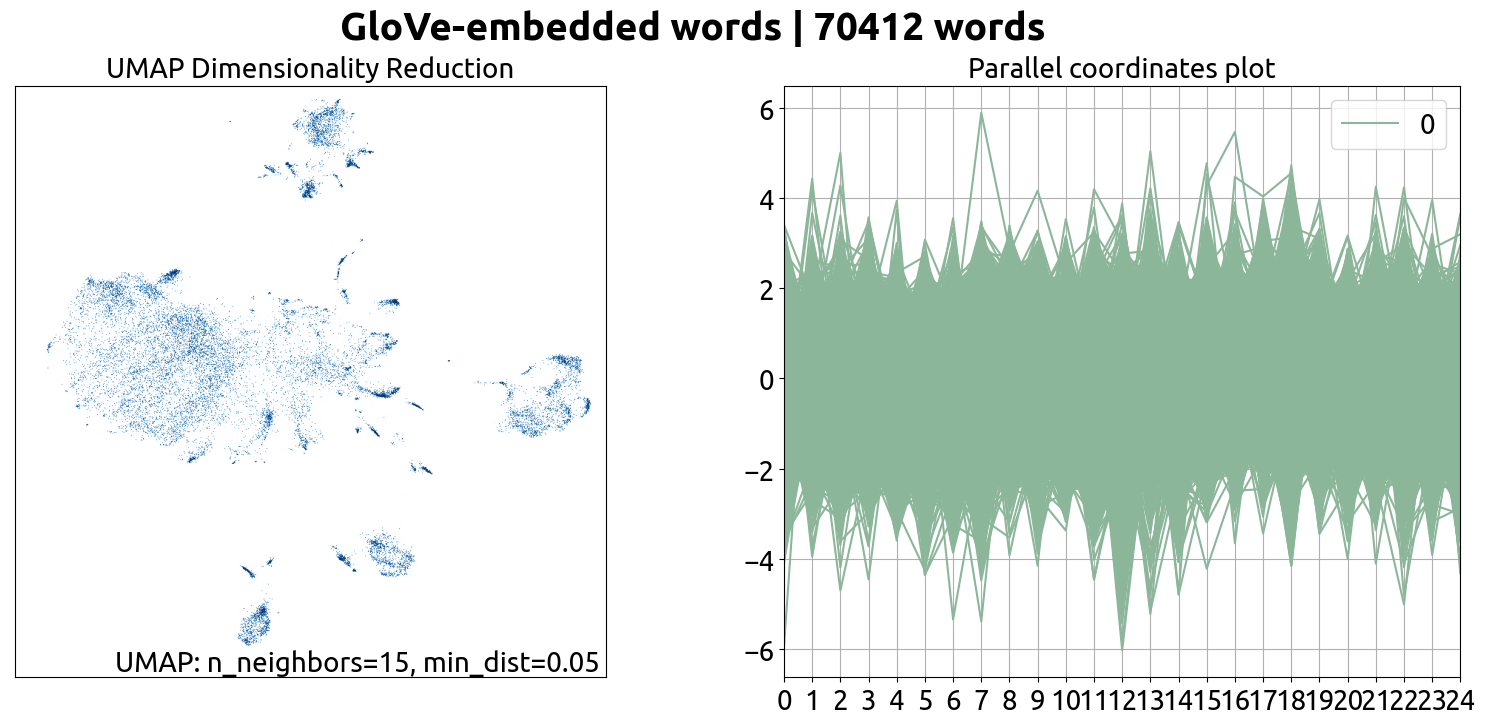

In [8]:
px = 1/plt.rcParams['figure.dpi'] # matplotlib sizes are in inches :-( :-( :-(
width = 1920
height = 768

plt.rc("font", size=20)
plt.rc("font", family="Ubuntu")
figure = plt.figure(figsize=(width*px, height*px))
figure.add_subplot(1, 2, 1)

# 1: UMAP
umap.plot.points(dimreducer,
    color_key_cmap="brg", # color_key_cmap="jet",
    ax=figure.get_axes()[0]
)
plt.title(f"UMAP Dimensionality Reduction", fontsize=20)

# 2: Parallel coordinates
figure.add_subplot(1, 2, 2)

dataframe = pd.DataFrame(words_glove)
dataframe["Label"] = 0
pd.plotting.parallel_coordinates(
    dataframe,
	class_column="Label",
    ax=figure.get_axes()[1],
    use_columns=False,
    axvlines=False
)

plt.title(f"Parallel coordinates plot", fontsize=20)
plt.suptitle(f"GloVe-embedded words | {len(words_glove)} words", fontsize=28, weight="bold")

plt.show()

In [10]:
words_tsne = TSNE().fit_transform(words_glove)

In [26]:

df

,x,y
0,20.136568,-24.378052
1,20.191587,-24.407066
2,20.181309,-24.392872
3,20.222069,-24.261648
4,-28.120930,-10.120804
...,...,...
70407,0.512244,17.794695
70408,-12.811351,11.678336
70409,-4.846803,16.769886
70410,-12.477894,12.100121


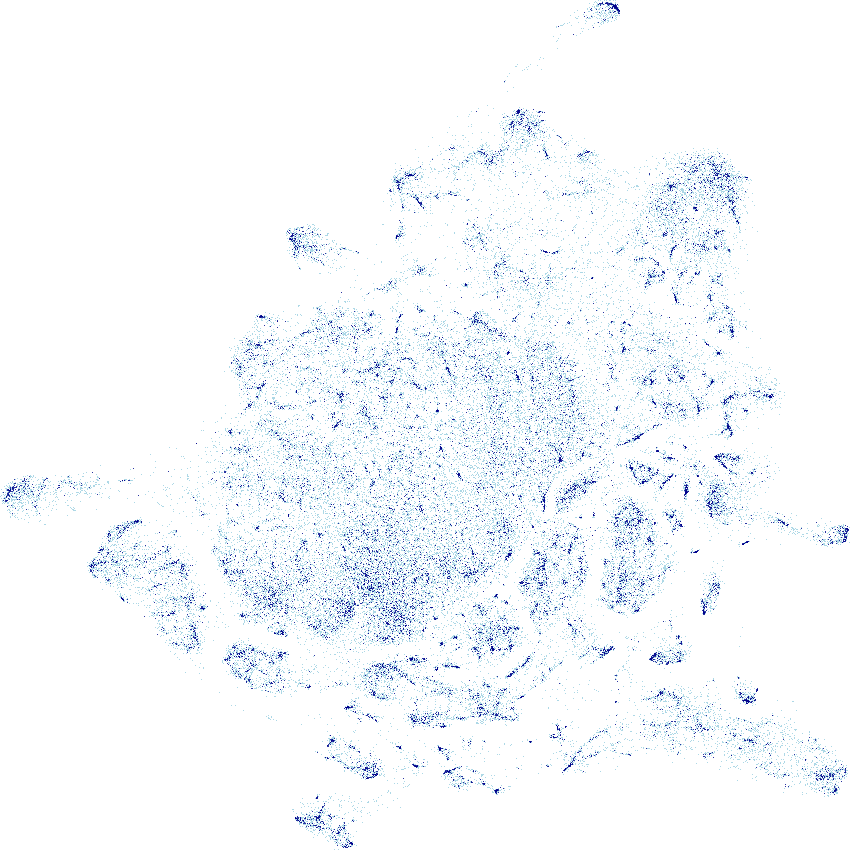

In [28]:
df_tsne = pd.DataFrame(words_tsne)
df_tsne.columns = ["x", "y"]

canvas_tsne = ds.Canvas(plot_width=850, plot_height=850)
points_tsne = canvas_tsne.points(df_tsne, "x", "y")
ds.tf.set_background(ds.tf.shade(points_tsne), color="white")